In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:


def cost_function(X, y, m, w, b):
    h = w * X + b
    cost = (1 / m) * np.sum(np.square((h - y)))
    return cost

def gradient_descent(X, y, m, w, b):
    h = w * X + b
    dw = (1 / m) * np.sum((h - y) * X)
    db = (1 / m) * np.sum(h - y)
    return dw, db;

def feature_scaling(X, X_min, X_max):
    X = (X - X_min) / (X_max - X_min)
    return X

def predict(X, w, b):
    y = w * X + b
    return y
    

In [24]:
df = pd.read_csv("data/monthly_csv.csv")
df.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [25]:
# Load data into variables
array = df.to_numpy()

y = df.iloc[:, 1].to_numpy()
X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy()

X_min = np.amin(X)
X_max = np.amax(X)

X = feature_scaling(X, X_min, X_max)
print(X[1:5])
print(y[1:5])


m = X.size

[0.00014273 0.00028547 0.0004282  0.00057094]
[34.73 34.73 34.73 34.73]


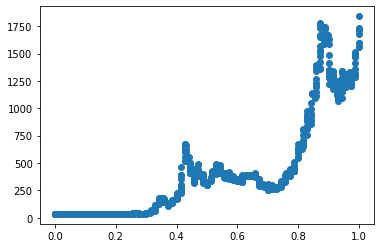

In [26]:
plt.scatter(X, y)

In [27]:
# Model
w = 0
b = 0

iterations = 1000
learning_rate = 0.08

for i in range(iterations):
    cost = cost_function(X, y, m, w, b)
    print("Cost: " + str(cost))
    dw, db = gradient_descent(X, y, m, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    


Cost: 379088.88181210513
Cost: 337390.7602520218
Cost: 303501.8024292686
Cost: 275923.4346004362
Cost: 253445.0534724493
Cost: 235088.68471116814
Cost: 220064.27689413587
Cost: 207733.58700341528
Cost: 197581.00634894628
Cost: 189189.99312067663
Cost: 182224.03409578296
Cost: 176411.26509461613
Cost: 171532.04705242353
Cost: 167408.92970096238
Cost: 163898.54401265716
Cost: 160885.052740565
Cost: 158274.85962160345
Cost: 155992.33535500325
Cost: 153976.36495363666
Cost: 152177.55861800993
Cost: 150555.9986181304
Cost: 149079.41917406305
Cost: 147721.73612214773
Cost: 146461.85914560355
Cost: 145282.73226673435
Cost: 144170.55873377773
Cost: 143114.17486572906
Cost: 142104.54422863616
Cost: 141134.34901826276
Cost: 140197.65996816475
Cost: 139289.6696923024
Cost: 138406.4772714544
Cost: 137544.91423549628
Cost: 136702.403986168
Cost: 135876.84823380795
Cost: 135066.53525656913
Cost: 134270.06578832612
Cost: 133486.293147437
Cost: 132714.27486959397
Cost: 131953.2336339436
Cost: 131202.5

In [28]:
print("w: " + str(w))
print("b: " + str(b))

w: 1295.5012767408145
b: -227.64654704190505


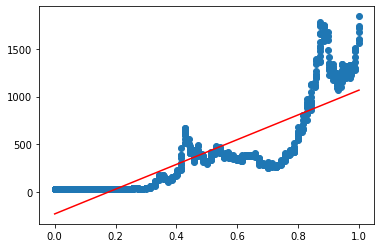

In [29]:
plt.plot(X, (w * X + b), "-r")
plt.scatter(X, y)
plt.show()

In [30]:
# Prediction
X_predict = feature_scaling(202108, X_min, X_max)
y_predit = predict(X_predict, w, b)
print("Predicted price for 2021-08: " + str(y_predict))

NameError: name 'y_predict' is not defined

In [31]:
# -------------------------------------------------------------------------------------

In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
# Reload data

X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy().reshape((-1, 1))

array([[195001],
       [195002],
       [195003],
       [195004],
       [195005],
       [195006],
       [195007],
       [195008],
       [195009],
       [195010],
       [195011],
       [195012],
       [195101],
       [195102],
       [195103],
       [195104],
       [195105],
       [195106],
       [195107],
       [195108],
       [195109],
       [195110],
       [195111],
       [195112],
       [195201],
       [195202],
       [195203],
       [195204],
       [195205],
       [195206],
       [195207],
       [195208],
       [195209],
       [195210],
       [195211],
       [195212],
       [195301],
       [195302],
       [195303],
       [195304],
       [195305],
       [195306],
       [195307],
       [195308],
       [195309],
       [195310],
       [195311],
       [195312],
       [195401],
       [195402],
       [195403],
       [195404],
       [195405],
       [195406],
       [195407],
       [195408],
       [195409],
       [195410],
       [195411

In [38]:
# Model

model = LinearRegression(normalize=True)
model.fit(X, y)
score = model.score(X, y)
print("Score: " + str(score))
print("b: " + str(model.intercept_))
print("w: " + str(model.coef_))

Score: 0.6961485617406079
b: -36433.23739576884
w: [0.18565455]


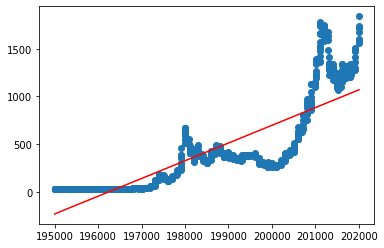

In [40]:
plt.plot(X, (model.coef_ * X + model.intercept_), "-r")
plt.scatter(X, y)
plt.show()

In [43]:
y_predict = model.predict(np.array([202108]).reshape((-1, 1)))
print(y_predict)

[1089.0314236]
